In [1]:
# imports
import pandas as pd
import numpy as np
import os
from scipy import stats

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)


# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")


# acquire
from env import host, user, password
from pydataset import data


#skelearn imports
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression





# docs
import acquire
import prepare


from io import StringIO


# Acquire

In [2]:
#Acquiring telco data from our SQL servers. 

telco = acquire.get_telco_data()

In [3]:
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [4]:
telco.shape

(7043, 24)

In [5]:
telco.info() # Looking at datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
telco.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [7]:
#Step 1 change all datatypes so we can do math:

In [8]:
telco[telco['total_charges'] == ' '] # Looking at which columns in total charges that is empty

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
85,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
156,3,1,3,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
236,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
255,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
339,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
5681,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
5717,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
5727,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
5798,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
6007,2,3,3,7644-OMVMY,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,19.85,,No,Two year,None,Mailed check


In [9]:
#Add zero to columns to convert to float
telco['total_charges'] = telco['total_charges'] + '0'

In [10]:
#make total charges into datatype float
telco['total_charges'] = telco['total_charges'].astype('float')

In [11]:
telco['total_charges'].dtype #checking to see if datatype was changed

dtype('float64')

In [12]:
telco.columns.tolist() # looking at list of columns

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [13]:
telco.info() # Looking at datatypes again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

# Prepare

In [14]:
telco.payment_type.value_counts() # Looking at value counts for payment_type only

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

In [15]:
#Looking at all unique values for each column that is an object except for the first index
for col in telco.columns:
    obj_list= list(telco.select_dtypes('object').columns)[1:]
    if col in obj_list:
            print(f'\n {col}')
            print(telco[col].value_counts())
    


 gender
Male      3555
Female    3488
Name: gender, dtype: int64

 partner
No     3641
Yes    3402
Name: partner, dtype: int64

 dependents
No     4933
Yes    2110
Name: dependents, dtype: int64

 phone_service
Yes    6361
No      682
Name: phone_service, dtype: int64

 multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

 online_security
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

 online_backup
No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

 device_protection
No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

 tech_support
No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

 streaming_tv
No                     2810
Yes           

# Working with Sarah

In [16]:
# filters to objects only starting at index 1 to put in dummy dataframe
col_list= list(telco.select_dtypes('object').columns)[1:] 

In [17]:
#creating dummy dataframe
dummy_df = pd.get_dummies(telco[col_list], dummy_na=False)
dummy_df

,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,1,0,0,1,0,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,1,1,0,1,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
2,1,0,1,0,1,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
3,0,1,0,1,0,1,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,0,1,0,1,1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,0,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
7039,1,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
7040,1,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
7041,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1


In [18]:
#combining original dataframe with dummy dataframe
telco_combined = pd.concat([telco, dummy_df], axis=1)
telco_combined.head(10)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,0,0,1,1,0,0,0,0,0,1
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,0,0,1,1,0,0,0,1,0,0
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,0,0,1,1,0,0,1,0,0,0
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,0,0,1,1,0,0,0,1,0,0
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,0,0,1,1,0,0,1,0,0,0
5,3,1,3,0114-IGABW,Female,0,Yes,No,71,No,...,0,0,1,1,0,0,1,0,0,0
6,2,1,3,0123-CRBRT,Female,0,Yes,Yes,61,Yes,...,0,0,1,1,0,0,0,0,0,1
7,3,1,3,0191-EQUUH,Female,0,No,Yes,25,No,...,0,0,1,1,0,0,1,0,0,0
8,3,1,3,0214-JHPFW,Female,0,Yes,No,70,No,...,0,0,1,1,0,0,1,0,0,0
9,3,1,3,0229-LFJAF,Male,0,No,No,72,Yes,...,0,0,1,1,0,0,1,0,0,0


In [19]:
#creating correlation table
corr_df=telco_combined.corr().reset_index()

In [20]:
corr_df #print to see correlation table

,index,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Female,gender_Male,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,payment_type_id,1.000000,0.008124,0.358913,-0.093704,0.340305,-0.074353,0.114336,0.005209,-0.005209,...,-0.347335,0.113981,0.295762,0.088956,-0.182323,0.117102,0.315658,0.769806,-0.814266,-0.149682
1,internet_service_type_id,0.008124,1.000000,0.099721,-0.032310,-0.030359,-0.323260,-0.082639,0.000863,-0.000863,...,-0.079919,-0.008904,0.101475,-0.856353,0.152555,0.803477,-0.017581,-0.032540,-0.091881,0.152481
2,contract_type_id,0.358913,0.099721,1.000000,-0.142554,0.671607,-0.074195,0.203353,-0.000126,0.000126,...,-0.915972,0.190926,0.884292,0.055352,-0.254157,0.242388,0.186440,0.210659,-0.342575,-0.004882
3,senior_citizen,-0.093704,-0.032310,-0.142554,1.000000,0.016567,0.220173,0.045504,0.001874,-0.001874,...,0.138360,-0.046262,-0.117000,-0.108322,0.255338,-0.182742,-0.016159,-0.024135,0.171718,-0.153477
4,tenure,0.340305,-0.030359,0.671607,0.016567,1.000000,0.247900,0.389632,-0.005106,0.005106,...,-0.645561,0.202570,0.558533,0.013274,0.019720,-0.039062,0.243510,0.233006,-0.208363,-0.233852
5,monthly_charges,-0.074353,-0.323260,-0.074195,0.220173,0.247900,1.000000,0.299540,0.014569,-0.014569,...,0.060165,0.004904,-0.074681,-0.160189,0.787066,-0.763557,0.042812,0.030550,0.271625,-0.377437
6,total_charges,0.114336,-0.082639,0.203353,0.045504,0.389632,0.299540,1.000000,-0.001618,0.001618,...,-0.206190,0.087569,0.156637,-0.024075,0.168907,-0.175740,0.078790,0.099927,-0.034933,-0.136221
7,gender_Female,0.005209,0.000863,-0.000126,0.001874,-0.005106,0.014569,-0.001618,1.000000,-1.000000,...,0.003386,-0.008026,0.003695,-0.006568,0.011286,-0.006026,0.016024,-0.001215,-0.000752,-0.013744
8,gender_Male,-0.005209,-0.000863,0.000126,-0.001874,0.005106,-0.014569,0.001618,-1.000000,1.000000,...,-0.003386,0.008026,-0.003695,0.006568,-0.011286,0.006026,-0.016024,0.001215,0.000752,0.013744
9,partner_No,-0.133115,-0.000891,-0.294806,-0.016479,-0.379697,-0.096848,-0.148215,-0.001808,0.001808,...,0.280865,-0.082783,-0.248091,0.000851,-0.000304,-0.000615,-0.110706,-0.082029,0.083852,0.095125


In [22]:
#rename columns in correlation table
corr_df.rename(columns={"index": "col_names"},  inplace= True)

In [23]:
# #Filter columns to only churn_no and churn_yes and tranpose table
corr_df= corr_df[(corr_df.col_names=='churn_No') | (corr_df.col_names=='churn_Yes')].T.reset_index()

In [24]:
corr_df #printing to see columns that were filtered

,index,38,39
0,col_names,churn_No,churn_Yes
1,payment_type_id,0.262818,-0.262818
2,internet_service_type_id,0.0472914,-0.0472914
3,contract_type_id,0.396713,-0.396713
4,senior_citizen,-0.150889,0.150889
5,tenure,0.352229,-0.352229
6,monthly_charges,-0.193356,0.193356
7,total_charges,0.0987746,-0.0987746
8,gender_Female,-0.0086121,0.0086121
9,gender_Male,0.0086121,-0.0086121


In [22]:
#Looking at column names in correlation table
corr_df.columns

Index(['index', 38, 39], dtype='object')

In [23]:
#Renaming more columns in correlation table
corr_df= corr_df.rename(columns={38:"churn_No", 39: "churn_Yes"})

In [24]:
#Drop first row to be able to sort values
corr_df= corr_df.drop([0], axis=0)

In [25]:
#Sort correlation values
corr_df.sort_values(by='churn_No')

,index,churn_No,churn_Yes
40,churn_Yes,-1,1
41,contract_type_Month-to-month,-0.405103,0.405103
19,online_security_No,-0.342637,0.342637
28,tech_support_No,-0.337281,0.337281
45,internet_service_type_Fiber optic,-0.30802,0.30802
49,payment_type_Electronic check,-0.301919,0.301919
22,online_backup_No,-0.268005,0.268005
25,device_protection_No,-0.252481,0.252481
6,monthly_charges,-0.193356,0.193356
38,paperless_billing_Yes,-0.191825,0.191825


# Takeaways

- Contract Month to Month accounts for the highest churn
- online_security_No = higher churn
- tech_support_No = higher churn
- internet_service_type_Fiber optic = higher churn
- payment_type_Electronic check = higher churn
- online_backup_No = higher churn

## DRIVER: Month to month customers 
- H0: There is no difference in churn for m2m customers
- Ha: There is a difference in churn for m2m customers

Questions:
- Do m2m customers pay more monthly?
- Do m2m customers have higher total charges?

# EXPLORE

In [26]:
alpha = .05 # defining alpha value

## Hypothesis 1
- H0: No Online security has no affect on churn (they are independent)
    
- Ha: No Online security has an affect on churn (they are dependent)

In [27]:
telco_combined.online_security_No.value_counts() # Looking at value counts to make sure didn't lose anything

0    3545
1    3498
Name: online_security_No, dtype: int64

In [28]:
#Performing chi^2 test
online_sec_crosstab= pd.crosstab(telco_combined.online_security_No, telco_combined.churn_Yes)

online_sec_crosstab

churn_Yes,0,1
online_security_No,,
0,3137,408
1,2037,1461


In [29]:
chi, p, degf, expected= stats.chi2_contingency(online_sec_crosstab)

In [30]:
chi, p, degf, expected

(825.2966857971479,
 1.7069157269925669e-181,
 1,
 array([[2604.26380804,  940.73619196],
        [2569.73619196,  928.26380804]]))

In [31]:
print('Observed\n')
print(online_sec_crosstab.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi:.4f}')
print(f'p     = {p:.4f}')

Observed

[[3137  408]
 [2037 1461]]
---
Expected

[[2604  940]
 [2569  928]]
---

chi^2 = 825.2967
p     = 0.0000


In [32]:
null_hypothesis = "No online security makes no difference in churn (they are independent)"

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Hypothesis 2:
- H0: No tech support has no affect on churn  (they are independent)
    
- Ha: No tech support has an affect on churn (they are dependent)

In [33]:
telco_combined.tech_support_No.value_counts() # Looking at value counts to make sure didn't lose anything

0    3570
1    3473
Name: tech_support_No, dtype: int64

In [34]:
#Performing chi^2 test
tech_supp_crosstab= pd.crosstab(telco_combined.tech_support_No, telco_combined.churn_Yes)

tech_supp_crosstab

churn_Yes,0,1
tech_support_No,,
0,3147,423
1,2027,1446


In [35]:
chi2, p2, degf2, expected2= stats.chi2_contingency(tech_supp_crosstab)

In [36]:
chi2, p2, degf2, expected2

(799.6724332372228,
 6.35740755126359e-176,
 1,
 array([[2622.62956127,  947.37043873],
        [2551.37043873,  921.62956127]]))

In [37]:
print('Observed\n')
print(tech_supp_crosstab.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p2:.4f}')

Observed

[[3147  423]
 [2027 1446]]
---
Expected

[[2604  940]
 [2569  928]]
---

chi^2 = 799.6724
p     = 0.0000


In [38]:
null_hypothesis = "No tech support makes no difference in churn (they are independent)"

if p2 < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Hypothesis 3:
- H0: contract month to month has no affect on churn  (they are independent)
    
- Ha: contract month to month has an affect on churn  (they are dependent)

In [39]:
telco_combined['contract_type_Month-to-month'].value_counts() # Looking at value counts to make sure didn't lose anything

1    3875
0    3168
Name: contract_type_Month-to-month, dtype: int64

In [40]:
#Performing chi^2 test
contract_m2m_crosstab= pd.crosstab(telco_combined['contract_type_Month-to-month'], telco_combined['churn_Yes'])

contract_m2m_crosstab

churn_Yes,0,1
contract_type_Month-to-month,,
0,2954,214
1,2220,1655


In [41]:
chi3, p3, degf3, expected3= stats.chi2_contingency(contract_m2m_crosstab)

In [42]:
chi3, p3, degf3, expected3

(1153.9716611093477,
 6.147585925549194e-253,
 1,
 array([[2327.30824933,  840.69175067],
        [2846.69175067, 1028.30824933]]))

In [43]:
print('Observed\n')
print(contract_m2m_crosstab.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi3:.4f}')
print(f'p     = {p3:.4f}')

Observed

[[2954  214]
 [2220 1655]]
---
Expected

[[2604  940]
 [2569  928]]
---

chi^2 = 1153.9717
p     = 0.0000


In [44]:
null_hypothesis = "Contract month to month makes no difference in churn (they are independent)"

if p3 < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Hypothesis 4:
- H0: No dependents has no affect on churn  (they are independent)
    
- Ha: No dependents has an affect on churn (they are dependent)

In [45]:
#Performing chi^2 test
no_dependents_crosstab= pd.crosstab(telco_combined['dependents_No'], telco_combined['churn_Yes'])

no_dependents_crosstab

churn_Yes,0,1
dependents_No,,
0,1784,326
1,3390,1543


In [46]:
chi4, p4, degf4, expected4= stats.chi2_contingency(no_dependents_crosstab)

In [47]:
chi4, p4, degf4, expected4

(189.1292494042347,
 4.924921661215491e-43,
 1,
 array([[1550.06957263,  559.93042737],
        [3623.93042737, 1309.06957263]]))

In [48]:
print('Observed\n')
print(no_dependents_crosstab.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi4:.4f}')
print(f'p     = {p4:.4f}')

Observed

[[1784  326]
 [3390 1543]]
---
Expected

[[2604  940]
 [2569  928]]
---

chi^2 = 189.1292
p     = 0.0000


In [49]:
null_hypothesis = "No dependents makes no difference in churn (they are independent)"

if p4 < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [50]:
#Looking at stats for monthly charges, month to month in customers, who have churned
telco_combined[['monthly_charges', 'contract_type_Month-to-month', 'churn_Yes']].describe()

,monthly_charges,contract_type_Month-to-month,churn_Yes
count,7043.000000,7043.000000,7043.000000
mean,64.761692,0.550192,0.265370
std,30.090047,0.497510,0.441561
min,18.250000,0.000000,0.000000
25%,35.500000,0.000000,0.000000
50%,70.350000,1.000000,0.000000
75%,89.850000,1.000000,1.000000
max,118.750000,1.000000,1.000000


In [51]:
#Looking at stats for monthly charges, month to month in customers, who have not churned
telco_combined[['monthly_charges', 'contract_type_Month-to-month', 'churn_No']].describe()

,monthly_charges,contract_type_Month-to-month,churn_No
count,7043.000000,7043.000000,7043.000000
mean,64.761692,0.550192,0.734630
std,30.090047,0.497510,0.441561
min,18.250000,0.000000,0.000000
25%,35.500000,0.000000,0.000000
50%,70.350000,1.000000,1.000000
75%,89.850000,1.000000,1.000000
max,118.750000,1.000000,1.000000


In [52]:
#Looking at stats for monthly charges, month to month in customers, who have churned
telco_combined[['total_charges', 'contract_type_Month-to-month', 'churn_Yes']].describe()

,total_charges,contract_type_Month-to-month,churn_Yes
count,7043.000000,7043.000000,7043.000000
mean,3241.911359,0.550192,0.265370
std,6848.637794,0.497510,0.441561
min,0.000000,0.000000,0.000000
25%,422.450000,0.000000,0.000000
50%,1468.750000,1.000000,0.000000
75%,4116.475000,1.000000,1.000000
max,84050.000000,1.000000,1.000000


## Hypothesis: 
- H0: There is no difference in monthly charges for m2m customers who have churned
- Ha: There is a difference in monthly charges for m2m customer who have churned

In [53]:
# new df with people who have churned, run 2 sample t test?
df_tyler= telco_combined[telco_combined['churn_Yes']== 1]

df_tyler

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
44,1,1,3,0617-AQNWT,Female,0,Yes,No,64,No,...,0,0,1,1,0,0,0,0,1,0
194,3,1,3,3400-ESFUW,Male,0,Yes,Yes,55,Yes,...,0,0,1,1,0,0,1,0,0,0
203,4,1,3,3512-IZIKN,Female,0,Yes,No,70,Yes,...,0,0,1,1,0,0,0,1,0,0
253,1,1,3,4355-HBJHH,Male,0,Yes,Yes,67,Yes,...,0,0,1,1,0,0,0,0,1,0
326,3,1,3,5458-CQJTA,Male,0,Yes,Yes,65,Yes,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,2,3,1,9025-ZRPVR,Male,0,No,No,9,Yes,...,1,0,0,0,0,1,0,0,0,1
6997,2,3,1,9063-ZGTUY,Female,0,Yes,Yes,61,Yes,...,1,0,0,0,0,1,0,0,0,1
7005,1,3,1,9174-FKWZE,Female,1,No,No,1,Yes,...,1,0,0,0,0,1,0,0,1,0
7012,2,3,1,9318-NKNFC,Male,0,No,No,1,Yes,...,1,0,0,0,0,1,0,0,0,1


In [54]:
#statistics for customers who are m2m that have churned
df_tyler[['monthly_charges','total_charges']].describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_charges,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.2,118.35
total_charges,1869.0,2116.459016,5364.515690,18.85,146.05,765.50,2483.5,78560.00


Takeways: people who have churned pay more monthly charges than people who have not. Total_charges is less for churned customers b/c they do not stay as long

In [55]:
#new df with customers who have not churned
df_tyler2= telco_combined[telco_combined['churn_No']== 1]

df_tyler2

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,0,0,1,1,0,0,0,0,0,1
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,0,0,1,1,0,0,0,1,0,0
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,0,0,1,1,0,0,1,0,0,0
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,0,0,1,1,0,0,0,1,0,0
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2,3,1,9932-WBWIK,Male,0,No,No,11,Yes,...,1,0,0,0,0,1,0,0,0,1
7038,2,3,1,9962-BFPDU,Female,0,Yes,Yes,1,Yes,...,1,0,0,0,0,1,0,0,0,1
7039,2,3,1,9967-ATRFS,Female,0,No,No,19,Yes,...,1,0,0,0,0,1,0,0,0,1
7040,4,3,1,9970-QBCDA,Female,0,No,No,6,Yes,...,1,0,0,0,0,1,0,1,0,0


In [56]:
#statistics for customers who are m2m that not churned
df_tyler2[['monthly_charges','total_charges']].describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_charges,5174.0,61.265124,31.092648,18.25,25.100,64.425,88.4000,118.75
total_charges,5174.0,3648.457634,7268.788922,0.00,601.925,1784.125,4618.6875,84050.00


Takeways: people who have not churned pay less monthly charges than people who have not. Total_charges is more for not churned customers b/c they stay longer.

<AxesSubplot:>

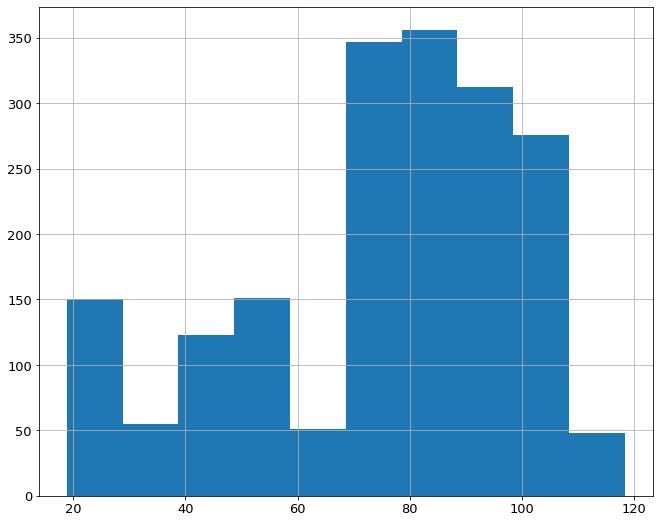

In [57]:
# histogram of churned customers
churn_sample =telco_combined[telco_combined.churn == "Yes"].monthly_charges

churn_sample.hist()

<AxesSubplot:>

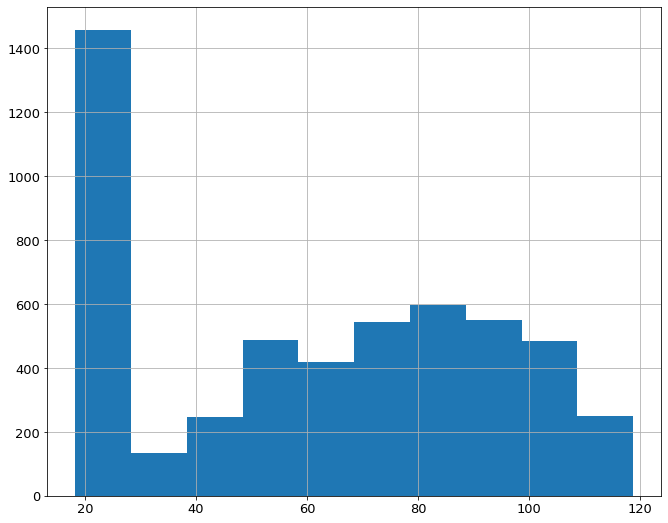

In [58]:
# histogram of non-churned customers

no_churn_sample = telco_combined[telco_combined.churn == 'No'].monthly_charges

no_churn_sample.hist()

In [59]:
# set alpha

alpha = .05

In [60]:
# compute statistic
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var= False)

t, p/2, alpha

(18.407526676414673, 4.2962246657737696e-73, 0.05)

In [61]:
# Deciding
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [62]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [63]:
#Looking at stats for monthly charges, month to month in customers, and not churned
telco_combined[['tenure', 'contract_type_Month-to-month', 'churn_No']].describe()

,tenure,contract_type_Month-to-month,churn_No
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.550192,0.734630
std,24.559481,0.497510,0.441561
min,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000
75%,55.000000,1.000000,1.000000
max,72.000000,1.000000,1.000000


In [64]:
#Looking at stats for tenure, month to month contract, and no churn
telco_combined[['tenure', 'contract_type_Month-to-month', 'churn_No']].describe()

,tenure,contract_type_Month-to-month,churn_No
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.550192,0.734630
std,24.559481,0.497510,0.441561
min,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000
75%,55.000000,1.000000,1.000000
max,72.000000,1.000000,1.000000


In [65]:
#Looking at stats for tenure, month to month contract, and yes churn
telco_combined[['tenure', 'contract_type_Month-to-month', 'churn_Yes']].describe()

,tenure,contract_type_Month-to-month,churn_Yes
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.550192,0.265370
std,24.559481,0.497510,0.441561
min,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,55.000000,1.000000,1.000000
max,72.000000,1.000000,1.000000


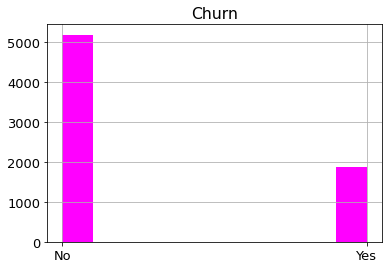

In [66]:
# Visual for overall churn and no churn
telco_combined['churn'].hist(color='magenta', figsize=(6,4))

plt.title('Churn')
plt.show()

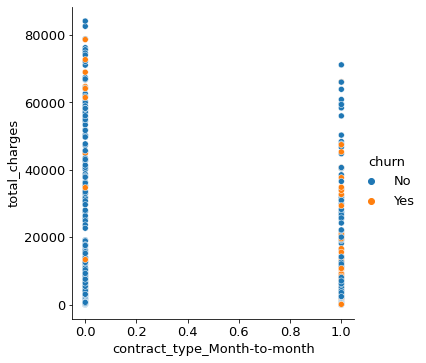

In [67]:
sns.relplot(data = telco_combined, x = 'contract_type_Month-to-month', y = 'total_charges', hue = 'churn')

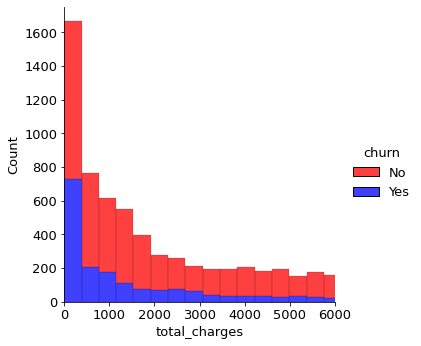

In [68]:
displot= sns.displot(data = telco_combined, x = 'total_charges', hue = 'churn', multiple = 'stack',
            palette = ['r', 'b'])
displot.set(ylim=(0, None))
displot.set(xlim=(0, 6000))

[(0.0, 9000.0)]

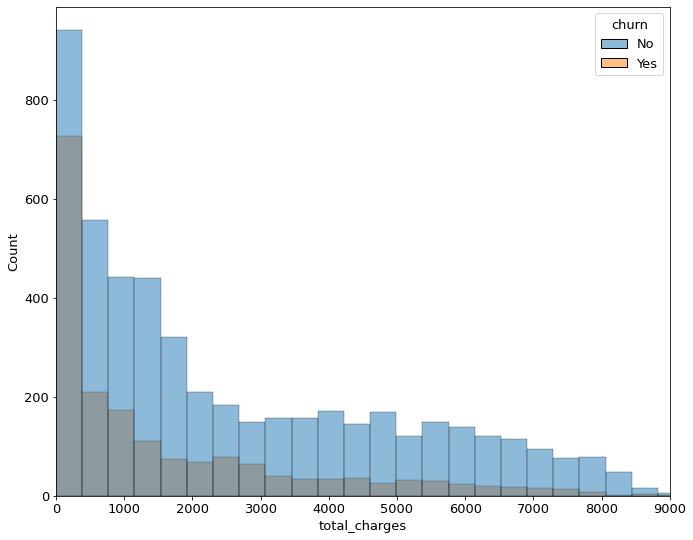

In [69]:
histplot= sns.histplot(data = telco_combined, x = 'total_charges', hue = 'churn')

histplot.set(xlim=(0, 9000))

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

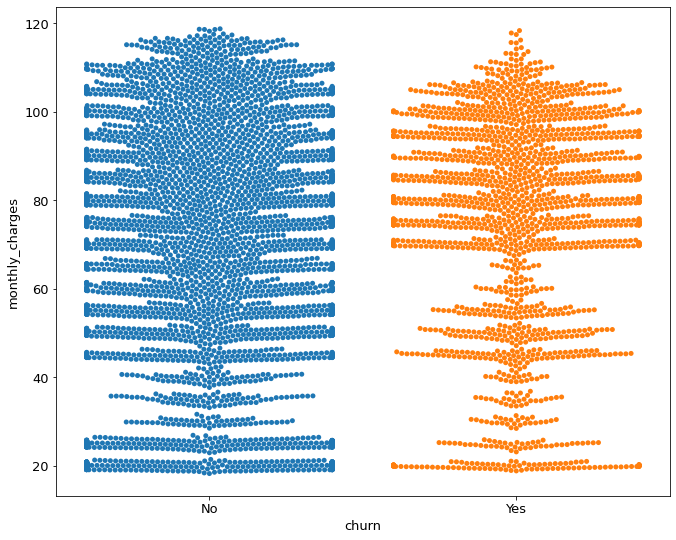

In [70]:
# swarmplot
sns.swarmplot(data = telco_combined, y = 'monthly_charges', x = 'churn')

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

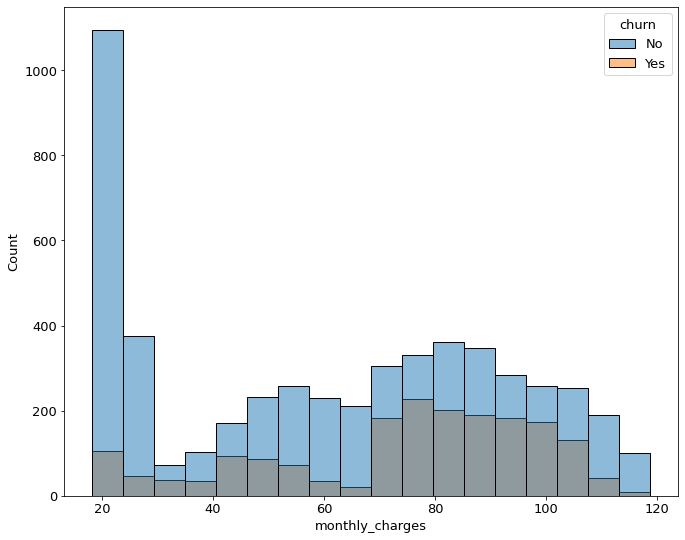

In [71]:
sns.histplot(data = telco_combined, x = 'monthly_charges', hue = 'churn')



In [72]:
telco_combined.columns # Looking at all columns in telco_combined

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_Female', 'gender_Male', 'partner_No',
       'partner_Yes', 'dependents_No', 'dependents_Yes', 'phone_service_No',
       'phone_service_Yes', 'multiple_lines_No',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_N

In [73]:
telco_combined['churn'] #Looking at values in telco_combined churn column

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041     No
7042    Yes
Name: churn, Length: 7043, dtype: object

In [74]:
telco_combined['churn']= (telco_combined['churn'] == 'Yes').astype(int) # Changing churn column to integer data type

In [75]:
telco_combined['churn'] # verifying column churn was changed to integer datatype

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    1
Name: churn, Length: 7043, dtype: int64

In [76]:
telco_combined.info() # Looking at all datatypes in telco_combined dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 67 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   payment_type_id                         7043 non-null   int64  
 1   internet_service_type_id                7043 non-null   int64  
 2   contract_type_id                        7043 non-null   int64  
 3   customer_id                             7043 non-null   object 
 4   gender                                  7043 non-null   object 
 5   senior_citizen                          7043 non-null   int64  
 6   partner                                 7043 non-null   object 
 7   dependents                              7043 non-null   object 
 8   tenure                                  7043 non-null   int64  
 9   phone_service                           7043 non-null   object 
 10  multiple_lines                          7043 non-null   obje

In [77]:
#Make new dataframe with numeric columns only
telco_combined2= telco_combined.select_dtypes(['int64', 'float64', 'uint8' ])

In [78]:


type(telco_combined2) #checking datatype of telco_combined2 

pandas.core.frame.DataFrame

In [79]:
telco_combined2.head() # Looking at first 5 values of telco_combined2 dataframe

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Female,gender_Male,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,3,0,65,90.45,5957.90,0,1,0,...,0,0,1,1,0,0,0,0,0,1
1,4,1,3,0,54,45.20,2460.55,0,0,1,...,0,0,1,1,0,0,0,1,0,0
2,3,1,3,0,56,45.05,2560.10,0,1,0,...,0,0,1,1,0,0,1,0,0,0
3,4,1,3,0,20,39.40,825.40,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,3,1,3,0,72,85.15,6316.20,0,0,1,...,0,0,1,1,0,0,1,0,0,0


In [80]:

def telco_split(df):
    '''
    This function take in the telco data acquired by get_titanic_data,
    performs a split and stratifies survived column.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=254, 
                                        stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=254, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [81]:
train, validate, test= telco_split(telco_combined2)

In [83]:
y_col = 'churn'

X_train, y_train = train.drop(columns= ['churn_Yes', 'churn_No', 'tenure']), train[y_col]
X_validate, y_validate = validate.drop(columns= ['churn_Yes', 'churn_No', 'tenure']), validate[y_col]
X_test, y_test = test.drop(columns= ['churn_Yes', 'churn_No','tenure']), test[y_col]

Note: drop churn_Yes and churn_No columns because it's causing overfitting in model, you are giving it target variables to overfit. Drop tenure b/c info is not up to date and this can cause issues with overfitting


## Baseline Model

In [84]:
telco_combined2['churn'].value_counts() #Looking at what has the highest value_counts

0    5174
1    1869
Name: churn, dtype: int64

In [85]:
# baseline prediction = 1 (Yes churn), choosing 1 as baseline because we want to focus on customers who churn

# 1. Create the object
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit the object
baseline.fit(X_train, y_train)
# how does it do on training data set?
print('Baseline accuracy: %.4f' % baseline.score(X_train, y_train))

Baseline accuracy: 0.7347


## Decision Tree Models

*Model 1*

In [86]:
#Model with hyperparameter 3
tree = DecisionTreeClassifier(max_depth=3, random_state=254)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=254)

In [87]:
print(f'training score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

training score: 100.00%
validate score: 100.00%


Note: This is overfitted to data because there are no hyperparameters in it

*Model 2*

In [88]:
#Model with max_depth set to 2
tree2 = DecisionTreeClassifier(max_depth= 2, random_state=254,  max_features= 4)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=4, random_state=254)

Note: random_state is like a primary key you are setting to your data. You set this so someone else can use this "key" to replicate your data and get the same results.

In [89]:
print(f'training score: {tree2.score(X_train, y_train):.2%}')
print(f'validate score: {tree2.score(X_validate, y_validate):.2%}')

training score: 73.47%
validate score: 73.45%


*Model 3*

In [90]:
#Model 3 with max_depth set to 2
tree3 = DecisionTreeClassifier(max_depth= 3, random_state=254,  max_features= 3)
tree3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, random_state=254)

In [91]:
print(f'training score: {tree3.score(X_train, y_train):.2%}')
print(f'validate score: {tree3.score(X_validate, y_validate):.2%}')

training score: 77.58%
validate score: 76.58%


In [92]:
#Model 4 with max_depth set to 2 and max_features set to 2
tree4 = DecisionTreeClassifier(max_depth= 3, random_state=254,  max_features= 2)
tree4 .fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=2, random_state=254)

In [93]:
print(f'training score: {tree4.score(X_train, y_train):.2%}')
print(f'validate score: {tree4.score(X_validate, y_validate):.2%}')

training score: 74.99%
validate score: 75.93%


In [94]:
# If time do accuracy for each model
#model_list = ['baseline', 'tree', 'tree2', 'tree3', 'tree4'] # creating model list for for loop below

In [95]:
# # sklearn.metrics.recall_score
# for model in model_list:
#     recall = recall_score(telco_combined.actual, telco_combined[model], pos_label='churn')
#     print(f'Recall score for {model} is {recall:.2%}')

Takeways:
- all decision tree models not much higher than the baseline model

## Logistic Regression Model

In [96]:
# Model 1
# Create the logistic regression object
logit = LogisticRegression(random_state=254)

# specify features we're using
ft = ['contract_type_Month-to-month', 'online_security_No','tech_support_No','internet_service_type_Fiber optic', 'monthly_charges']


# Fit a model
logit.fit(X_train[ft], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[ft])


In [97]:
print(f'training score: {logit.score(X_train[ft], y_train):.2%}')
print(f'validate score: {logit.score(X_validate[ft], y_validate):.2%}')

training score: 78.49%
validate score: 78.65%


In [99]:
#Looking at test score 
print(f'test score: {logit.score(X_test[ft], y_test):.2%}')

test score: 78.65%


In [100]:
# Model 2
# Create the logistic regression object
logit2= LogisticRegression(random_state=254, class_weight='balanced')

# specify features we're using
ft = ['contract_type_Month-to-month', 'online_security_No','tech_support_No','internet_service_type_Fiber optic', 'monthly_charges']


# Fit a model
logit2.fit(X_train[ft], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred2 = logit.predict(X_train[ft])


In [101]:
print(f'training score: {logit2.score(X_train[ft], y_train):.2%}')
print(f'validate score: {logit2.score(X_validate[ft], y_validate):.2%}')

training score: 72.79%
validate score: 74.04%


In [102]:
# Model 3
# Create the logistic regression object
logit3= LogisticRegression(random_state=254, class_weight={0:40, 1:60})

# specify features we're using
ft = ['contract_type_Month-to-month', 'online_security_No','tech_support_No','internet_service_type_Fiber optic', 'monthly_charges']


# Fit a model
logit3.fit(X_train[ft], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred3 = logit.predict(X_train[ft])


In [103]:
print(f'training score: {logit3.score(X_train[ft], y_train):.2%}')
print(f'validate score: {logit3.score(X_validate[ft], y_validate):.2%}')

training score: 75.50%
validate score: 75.64%


Takeways:
- Logistic regression model 1 is best model in terms of accuracy.

Create the Predictions CSV
Create a CSV file with probability of class, prediction of churn (1=churn, 0=not_churn)

These predictions should be from your best performing model that you ran on X_test. Note that the order of the y_pred and y_proba are numpy arrays coming from running the model on X_test. The order of those values will match the order of the rows in X_test, so you can obtain the customer_id from X_test and concatenate these values together into a dataframe to write to CSV.# CSV file

In [105]:
probability_test = logit.predict_proba(X_test[ft])

probability_test_prediction = logit.predict(X_test[ft])

In [108]:
probability_df = pd.DataFrame(probability_test, columns=logit.classes_.tolist())
probability_df.head()

,0,1
0,0.542976,0.457024
1,0.833449,0.166551
2,0.908066,0.091934
3,0.814442,0.185558
4,0.548945,0.451055


In [109]:
reset_test = test.reset_index()
reset_test.head()

,index,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Female,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,4066,1,2,1,0,53,92.55,4779.45,0,0,...,1,0,0,0,1,0,0,0,1,0
1,6607,2,3,1,0,1,19.30,19.30,0,0,...,1,0,0,0,0,1,0,0,0,1
2,992,4,1,2,0,30,64.50,1929.95,0,0,...,0,1,0,1,0,0,0,1,0,0
3,3357,3,2,2,0,62,94.00,5757.20,0,1,...,0,1,0,0,1,0,1,0,0,0
4,4868,3,2,1,1,58,100.40,5749.80,0,1,...,1,0,0,0,1,0,1,0,0,0


In [111]:
test_probability_df = pd.concat([reset_test, probability_df], axis=1)
test_probability_df.head()

,index,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Female,...,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,0,1
0,4066,1,2,1,0,53,92.55,4779.45,0,0,...,0,0,1,0,0,0,1,0,0.542976,0.457024
1,6607,2,3,1,0,1,19.30,19.30,0,0,...,0,0,0,1,0,0,0,1,0.833449,0.166551
2,992,4,1,2,0,30,64.50,1929.95,0,0,...,0,1,0,0,0,1,0,0,0.908066,0.091934
3,3357,3,2,2,0,62,94.00,5757.20,0,1,...,0,0,1,0,1,0,0,0,0.814442,0.185558
4,4868,3,2,1,1,58,100.40,5749.80,0,1,...,0,0,1,0,1,0,0,0,0.548945,0.451055


In [113]:
test_probability_df['predicted'] = probability_test_prediction
test_probability_df.head()

,index,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Female,...,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,0,1,predicted
0,4066,1,2,1,0,53,92.55,4779.45,0,0,...,0,1,0,0,0,1,0,0.542976,0.457024,0
1,6607,2,3,1,0,1,19.30,19.30,0,0,...,0,0,1,0,0,0,1,0.833449,0.166551,0
2,992,4,1,2,0,30,64.50,1929.95,0,0,...,1,0,0,0,1,0,0,0.908066,0.091934,0
3,3357,3,2,2,0,62,94.00,5757.20,0,1,...,0,1,0,1,0,0,0,0.814442,0.185558,0
4,4868,3,2,1,1,58,100.40,5749.80,0,1,...,0,1,0,1,0,0,0,0.548945,0.451055,0


In [114]:
csv_df = test_probability_df[['contract_type_Month-to-month', 'online_security_No','tech_support_No','internet_service_type_Fiber optic', 'monthly_charges']]
csv_df.head()

,contract_type_Month-to-month,online_security_No,tech_support_No,internet_service_type_Fiber optic,monthly_charges
0,1,1,0,1,92.55
1,1,0,0,0,19.30
2,0,1,1,0,64.50
3,0,1,1,1,94.00
4,1,1,0,1,100.40
